In [1]:
import numpy as np
import pandas as pd
import wrds
import datetime as dt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/final_data/outsamp_bert_outp_headline.csv")

In [3]:
df = df[df.sentiment!='neutral']

In [4]:
df.returns = df.returns/3
df.label = df.label.str.lower()
df.loc[df.label=="negative",'b_score'] = 1-df.score
df.loc[df.label=="positive",'b_score'] = df.score

In [5]:
df

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname,label,score,b_score
0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-1.621247,3.253156,positive,1,PFE,negative,0.992612,0.007388
3,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-2.127243,-0.742992,negative,2,BMY,negative,0.915959,0.084041
4,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.264329,0.372423,positive,1,GSK,negative,0.905516,0.094484
5,1,04/01/16,22/01/16,present goldman sach healthcar ceo unscript vi...,present goldman sach healthcar ceo unscript vi...,-0.927682,1.264571,positive,1,MRK,negative,0.984209,0.015791
8,1,04/01/16,22/01/16,scientif corpor earn call feb.scientif corpor ...,scientif corpor earn call feb scientif corpor ...,-1.066556,-3.176648,negative,2,BSX,negative,0.985831,0.014169
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7252,363,12/12/22,30/12/22,cardin announc execut chang effect februari.,cardin announc execut chang effect februari,-0.079186,0.988233,positive,1,CAH,negative,0.991591,0.008409
7255,363,12/12/22,30/12/22,cv corpor earn call feb.hmg strategi llc centr...,cv corpor earn call feb hmg strategi llc centr...,-2.774265,3.403083,positive,1,CVS,negative,0.989900,0.010100
7257,363,12/12/22,30/12/22,gsk plc announc new global headquart central l...,gsk plc announc new global headquart central l...,-0.769113,2.055391,positive,1,GSK,negative,0.986561,0.013439
7258,363,12/12/22,30/12/22,bristol myer squibb announc first disclosur ne...,bristol myer squibb announc first disclosur ne...,-2.909204,1.042762,positive,1,BMY,negative,0.994675,0.005325


In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
ticks = df.compname.unique().tolist()
weeks = df.week.unique().tolist()

In [8]:
mktcap = pd.read_csv("/Users/dhruvishah/Desktop/Quant_Fin/SEM 2/Dissertation/mktcap2016.csv")
mktcap.sort_values(by="Market Capitalization", inplace=True, ascending=False)
mktcap = mktcap.loc[mktcap['Ticker Name'].isin(ticks)]
mktcap.reset_index(drop=True, inplace=True)

In [9]:
mktcap

,Ticker Name,Market Capitalization
0,JNJ,2.780225e+08
1,PFE,1.972434e+08
2,MRK,1.466051e+08
3,GILD,1.393702e+08
4,AMGN,1.193884e+08
5,BMY,1.118252e+08
6,UNH,1.109990e+08
7,CVS,1.068118e+08
8,MDT,1.065444e+08
9,LLY,9.182634e+07


In [10]:
cap = mktcap['Market Capitalization'].sum()
for i in range(len(mktcap["Ticker Name"])):
#     temp = df[df.compname==i]
#     temp.loc['']
#     df.loc[df.compname==mktcap["Ticker Name"][i], 'vw'] = mktcap['Market Capitalisation'][i]/cap
    df.loc[df.compname==mktcap["Ticker Name"][i], 'mkt_cap'] = mktcap['Market Capitalization'][i]

In [11]:
df['Rank'] = df.groupby(['week'])['b_score'].rank(method='first')

In [12]:
# df_pos = df[df.label!="negative"]
df_neg = df[df.label!="positive"]
# df_pos['Rank'] = df_pos.groupby(['week', 'label'])['score'].rank(method='first', ascending=False)
df_neg['Rank'] = df_neg.groupby(['week'])['score'].rank(method='first', ascending=False)
# df_pos['Rank_lm'] = df_pos.groupby(['week', 'sentiment'])['tf-idf'].rank(method='first', ascending=False)
# df_neg['Rank_lm'] = df_neg.groupby(['week', 'sentiment'])['tf-idf'].rank(method='first', ascending=False)

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/3721807284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['Rank'] = df_neg.groupby(['week'])['score'].rank(method='first', ascending=False)


In [13]:
mktcap['Market Capitalization'].sum()

1786551310.65

In [14]:
df[df.week==1]

,week,FROM,TO,headline,clean_headline,returns,tf-idf,sentiment,sent_score,compname,label,score,b_score,mkt_cap,Rank
0,1,04/01/16,22/01/16,kinem enter strateg proteom biomark discoveri ...,kinem enter strateg proteom biomark discoveri ...,-1.621247,3.253156,positive,1,PFE,negative,0.992612,0.007388,1.972434e+08,2.0
1,1,04/01/16,22/01/16,sach associ ltd annual cancer biopartn invest ...,sach associ ltd annual cancer biopartn invest ...,-2.127243,-0.742992,negative,2,BMY,negative,0.915959,0.084041,1.118252e+08,9.0
2,1,04/01/16,22/01/16,sach associ ltd annual european life scienc ce...,sach associ ltd annual european life scienc ce...,-0.264329,0.372423,positive,1,GSK,negative,0.905516,0.094484,1.601124e+07,10.0
3,1,04/01/16,22/01/16,present goldman sach healthcar ceo unscript vi...,present goldman sach healthcar ceo unscript vi...,-0.927682,1.264571,positive,1,MRK,negative,0.984209,0.015791,1.466051e+08,7.0
4,1,04/01/16,22/01/16,scientif corpor earn call feb.scientif corpor ...,scientif corpor earn call feb scientif corpor ...,-1.066556,-3.176648,negative,2,BSX,negative,0.985831,0.014169,2.420006e+07,6.0
5,1,04/01/16,22/01/16,announc quarterli dividend first quarter payab...,announc quarterli dividend first quarter payab...,-1.937358,-1.928035,negative,2,JNJ,negative,0.988738,0.011262,2.780225e+08,4.0
6,1,04/01/16,22/01/16,present jpmorgan annual healthcar confer jan.a...,present jpmorgan annual healthcar confer jan a...,-1.283393,0.253441,positive,1,AMGN,negative,0.987031,0.012969,1.193884e+08,5.0
7,1,04/01/16,22/01/16,scienc announc u fda prioriti review design so...,scienc announc u fda prioriti review design so...,-3.083289,-0.061222,negative,2,GILD,negative,0.993091,0.006909,1.393702e+08,1.0
8,1,04/01/16,22/01/16,well fargo secur llc well fargo secur healthca...,well fargo secur llc well fargo secur healthca...,-0.433394,0.865432,positive,1,MDT,negative,0.990947,0.009053,1.065444e+08,3.0
9,1,04/01/16,22/01/16,activ biotech announc discontinu higher dose l...,activ biotech announc discontinu higher dose l...,-1.208600,-1.228938,negative,2,TEVA,negative,0.981029,0.018971,5.102248e+07,8.0


In [15]:
def get_portfolio_long_ew(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        weights = 1/len(mid_df)
        returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

# fig = plt.figure()
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax1.plot(get_portfolio_long_ew(df))
# ax1.set_xlabel('Date')
# ax1.set_ylabel("Cumulative Returns")
# ax1.set_title("Long Portfolio Cumulative Returns")
# plt.show()

In [16]:
def get_portfolio_short_ew(frame):
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        weights = 1/len(mid_df)
        returns = sum(mid_df.returns*weights)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 

In [17]:
def get_portfolio_long_vw(frame):
    ret = [0]
    cum_ret = 1
    for i in weeks[1:]:
        temp = frame[frame.week == i]
        stock = max(temp.Rank) - 4
        mid_df = temp[temp.Rank >= stock]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret) 
    return ret 
# get_portfolio_long_vw(df)

In [18]:
def get_portfolio_short_vw(frame):
    ret = [0]
    cum_ret = 0
    for i in weeks[1:]:
        temp = frame[frame.week == i]
#         stock = min(temp.Rank) - 4
        mid_df = temp[temp.Rank <= 5]
        if len(mid_df) > 5:
            idx = 5-len(mid_df)
            mid_df = mid_df[:idx]
        cap_sum = sum(mid_df.mkt_cap)
        weights = mid_df.mkt_cap/cap_sum
        returns = sum(mid_df.returns*weights)
#         returns = sum(mid_df.returns*mid_df.vw)
        cum_ret = returns
        ret.append(cum_ret)
    return ret
# get_portfolio_short_vw(df_neg)

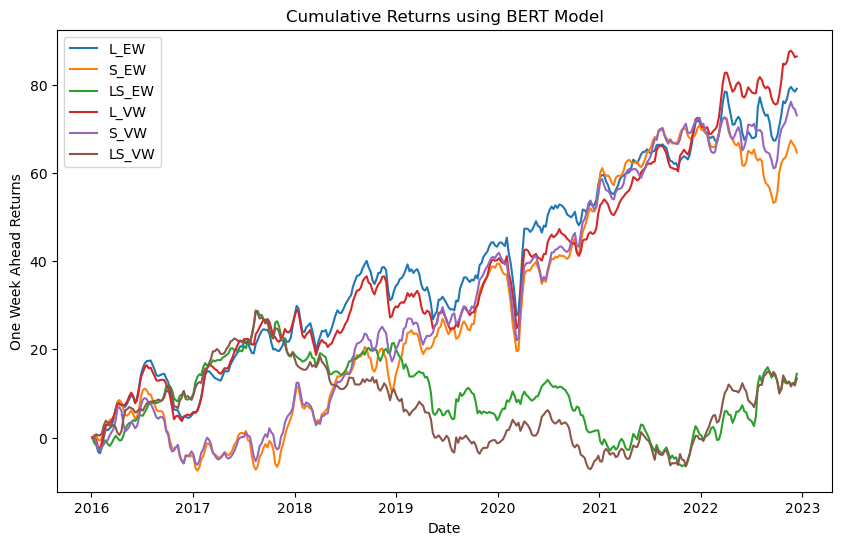

In [43]:
df['FROM'] = pd.to_datetime(df['FROM'], format='%d/%m/%y')
l_ew = pd.Series(get_portfolio_long_ew(df))
s_ew = pd.Series(get_portfolio_short_ew(df_neg))
ls_ew = l_ew+(-1*s_ew)
l_vw = pd.Series(get_portfolio_long_vw(df))
s_vw = pd.Series(get_portfolio_short_vw(df_neg))
ls_vw = l_vw+(-1*s_vw)
yrs = pd.DatetimeIndex(df['FROM']).unique().tolist()
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the lines
plt.plot(yrs, np.cumsum(l_ew), label='L_EW')
plt.plot(yrs, np.cumsum(s_ew), label='S_EW')
plt.plot(yrs, np.cumsum(ls_ew), label='LS_EW')
plt.plot(yrs, np.cumsum(l_vw), label='L_VW')
plt.plot(yrs, np.cumsum(s_vw), label='S_VW')
plt.plot(yrs, np.cumsum(ls_vw), label='LS_VW')
plt.xlabel('Date')  # Replace with your actual x-axis label
plt.ylabel('One Week Ahead Returns')
plt.title('Cumulative Returns using BERT Model')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [20]:
df.label

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
4650    negative
4651    negative
4652    negative
4653    negative
4654    negative
Name: label, Length: 4655, dtype: object

In [21]:
print("Accuracy score for finbert model = ", accuracy_score(df.sentiment,df.label.fillna('')))

Accuracy score for finbert model =  0.47003222341568207


In [22]:
port_vals = pd.DataFrame(columns=['avg', 'stdev', 'std_downside', 'sharpe_ratio', 'sortino_ratio','ff3_alpha', 'ff3_r2', 'ff5_alpha', 'ff5_r2'])

In [23]:
avg = [np.mean(l_ew)] + [np.mean(s_ew)] + [np.mean(ls_ew)] + [np.mean(l_vw)] + [np.mean(s_vw)] + [np.mean(ls_vw)] 
stdev = [np.std(l_ew)] + [np.std(s_ew)] + [np.std(ls_ew)] + [np.std(l_vw)] + [np.std(s_vw)] + [np.std(ls_vw)]

In [24]:
downside = [np.std(l_ew[l_ew < 0]), np.std(s_ew[s_ew < 0]), np.std(ls_ew[ls_ew < 0]),np.std(l_vw[l_vw < 0]),
            np.std(s_vw[s_vw < 0]), np.std(ls_vw[ls_vw < 0])]

In [25]:
port_vals['avg'] = avg
port_vals['stdev'] = stdev
port_vals['std_downside'] = downside

In [26]:
new_index = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']
port_vals = port_vals.set_index(pd.Index(new_index))

In [27]:
for i in range(len(port_vals)):
    port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.stdev[i]
    port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.std_downside[i]
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/2852972423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sharpe_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.stdev[i]
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/2852972423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.sortino_ratio[i]=(port_vals.avg[i]-0.008)/port_vals.std_downside[i]


,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.217744,1.464113,0.931691,0.143256,0.225121,NaN,NaN,NaN,NaN
s_ew,0.177936,1.439240,0.931834,0.118074,0.182368,NaN,NaN,NaN,NaN
ls_ew,0.039807,1.137169,0.654363,0.02797,0.048608,NaN,NaN,NaN,NaN
l_vw,0.237959,1.339377,0.868692,0.171691,0.264719,NaN,NaN,NaN,NaN
s_vw,0.201116,1.446921,0.935776,0.133467,0.20637,NaN,NaN,NaN,NaN
ls_vw,0.036843,1.063817,0.627068,0.027113,0.045997,NaN,NaN,NaN,NaN


In [28]:
ff3 = pd.read_csv("ff3.csv")
ff3.date = pd.to_datetime(ff3['date'], format='%d/%m/%y')
ff3.set_index('date', inplace=True)

start = []
weekly_first_days = ff3.resample('W-MON').first()

weekly_first_days = weekly_first_days.dropna()

start = weekly_first_days.index.strftime('%d/%m/%y').tolist()
start_list = start[:-1]

end = []
weekly_last_days = ff3.resample('W-FRI').last()

weekly_last_days = weekly_last_days.dropna()

end_list = weekly_last_days.index.strftime('%d/%m/%y').tolist()
weekly_df = pd.DataFrame(columns=[['FROM'] +['TO']])
start_list = pd.to_datetime(start_list, format='%d/%m/%y')
end_list = pd.to_datetime(end_list, format='%d/%m/%y')
start_list = start_list.sort_values()
end_list = end_list.sort_values()

In [29]:
cols = ff3.columns.tolist()

weekly_df = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff3[(ff3.index >= start_date) & (ff3.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df = pd.concat([weekly_df, data])
#     data = selected_data.iloc[0]
#     weekly_df.at[i,'FROM'] = start_date
#     weekly_df.at[i,'mktrf'] = data[0]
#     weekly_df.at[i,'smb'] = data[1]
#     weekly_df.at[i,'hml'] = data[2]
#     weekly_df.at[i,'rf'] = data[3]
#     weekly_df.at[i,'umd'] = data[4]

In [30]:
weekly_df['date'] = start_list
weekly_df

,mktrf,smb,hml,rf,umd,date
0,-0.0637,-0.0198,0.0058,0.00000,0.0141,2016-01-04
0,-0.0250,-0.0137,-0.0020,0.00000,0.0253,2016-01-11
0,0.0140,0.0023,-0.0155,0.00000,-0.0126,2016-01-18
0,0.0176,-0.0052,0.0359,0.00000,-0.0160,2016-01-25
0,-0.0337,-0.0150,0.0109,0.00005,-0.0357,2016-02-01
...,...,...,...,...,...,...
0,0.0129,0.0124,-0.0250,0.00074,-0.0209,2022-11-28
0,-0.0380,-0.0131,-0.0055,0.00080,0.0093,2022-12-05
0,-0.0208,0.0004,0.0021,0.00080,0.0101,2022-12-12
0,-0.0037,-0.0093,0.0286,0.00080,0.0458,2022-12-19


In [31]:
weekly = weekly_df.loc[weekly_df['date'].isin(df.FROM.unique())]
weekly.reset_index(drop=True, inplace=True)

weekly['l_ew'] = l_ew
weekly['s_ew'] = s_ew
weekly['ls_ew'] = ls_ew
weekly['l_vw'] = l_vw
weekly['s_vw'] = s_vw
weekly['ls_vw'] = ls_vw

weekly

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/1357161703.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/1357161703.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/1357161703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,mktrf,smb,hml,rf,umd,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0198,0.0058,0.00000,0.0141,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0137,-0.0020,0.00000,0.0253,2016-01-11,-0.623600,0.567314,-1.190914,-0.199065,-0.092627,-0.106438
2,0.0140,0.0023,-0.0155,0.00000,-0.0126,2016-01-18,-0.649339,-0.073497,-0.575842,-0.283274,-1.124835,0.841562
3,0.0176,-0.0052,0.0359,0.00000,-0.0160,2016-01-25,-1.930788,-0.952872,-0.977917,-1.719750,-1.513079,-0.206671
4,-0.0337,-0.0150,0.0109,0.00005,-0.0357,2016-02-01,-0.370059,-0.274237,-0.095822,-0.287753,-0.210761,-0.076992
...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0157,0.0078,0.00070,0.0580,2022-11-14,2.079951,1.653715,0.426236,2.171814,1.789652,0.382162
359,0.0143,-0.0063,0.0093,0.00056,0.0037,2022-11-21,0.581832,1.113313,-0.531482,0.252573,1.348342,-1.095769
360,0.0129,0.0124,-0.0250,0.00074,-0.0209,2022-11-28,-0.675073,-0.780465,0.105392,-0.550012,-1.316158,0.766146
361,-0.0380,-0.0131,-0.0055,0.00080,0.0093,2022-12-05,-0.388242,-0.592471,0.204229,-0.925672,-0.368423,-0.557249


In [32]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly[['mktrf', 'smb', 'hml']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff3_alpha[i] = model.params['const']
    port_vals.ff3_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/1889115454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/1889115454.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff3_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/1889115454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.217744,1.464113,0.931691,0.143256,0.225121,0.170782,13.670155,NaN,NaN
s_ew,0.177936,1.439240,0.931834,0.118074,0.182368,0.130874,14.781593,NaN,NaN
ls_ew,0.039807,1.137169,0.654363,0.02797,0.048608,0.039908,0.30433,NaN,NaN
l_vw,0.237959,1.339377,0.868692,0.171691,0.264719,0.198736,11.14336,NaN,NaN
s_vw,0.201116,1.446921,0.935776,0.133467,0.20637,0.157113,12.348099,NaN,NaN
ls_vw,0.036843,1.063817,0.627068,0.027113,0.045997,0.041624,0.40101,NaN,NaN


In [33]:
ff5 = pd.read_csv("ff5.csv")
ff5.date = pd.to_datetime(ff5['date'], format='%d/%m/%y')
ff5.set_index('date', inplace=True)
# cols = ff3.columns.tolist()
weekly_df_ff5 = pd.DataFrame(columns= cols)
for i in range(len(start_list)):
    start_date = start_list[i]
    end_date = end_list[i]
    selected_data = ff5[(ff5.index >= start_date) & (ff5.index <= end_date)]
    data = selected_data.sum()
    data = pd.DataFrame(data).T
    weekly_df_ff5 = pd.concat([weekly_df_ff5, data])
weekly_df_ff5['date'] = start_list
weekly_ff5 = weekly_df_ff5.loc[weekly_df_ff5['date'].isin(df.FROM.unique())]
weekly_ff5.reset_index(drop=True, inplace=True)

weekly_ff5['l_ew'] = l_ew
weekly_ff5['s_ew'] = s_ew
weekly_ff5['ls_ew'] = ls_ew
weekly_ff5['l_vw'] = l_vw
weekly_ff5['s_vw'] = s_vw
weekly_ff5['ls_vw'] = ls_vw
weekly_ff5

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/3423993167.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['l_ew'] = l_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/3423993167.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_ff5['s_ew'] = s_ew
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/3423993167.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,mktrf,smb,hml,rf,umd,rmw,cma,date,l_ew,s_ew,ls_ew,l_vw,s_vw,ls_vw
0,-0.0637,-0.0204,0.0058,0.00000,0.0141,0.0129,0.0117,2016-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.0250,-0.0136,-0.0020,0.00000,0.0253,0.0075,0.0063,2016-01-11,-0.623600,0.567314,-1.190914,-0.199065,-0.092627,-0.106438
2,0.0140,-0.0001,-0.0155,0.00000,-0.0126,0.0040,-0.0029,2016-01-18,-0.649339,-0.073497,-0.575842,-0.283274,-1.124835,0.841562
3,0.0176,-0.0029,0.0359,0.00000,-0.0160,0.0055,0.0149,2016-01-25,-1.930788,-0.952872,-0.977917,-1.719750,-1.513079,-0.206671
4,-0.0337,-0.0115,0.0109,0.00005,-0.0357,0.0206,0.0153,2016-02-01,-0.370059,-0.274237,-0.095822,-0.287753,-0.210761,-0.076992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,-0.0097,-0.0123,0.0078,0.00070,0.0580,0.0294,0.0219,2022-11-14,2.079951,1.653715,0.426236,2.171814,1.789652,0.382162
359,0.0143,-0.0056,0.0093,0.00056,0.0037,0.0027,0.0042,2022-11-21,0.581832,1.113313,-0.531482,0.252573,1.348342,-1.095769
360,0.0129,0.0060,-0.0250,0.00074,-0.0209,-0.0099,-0.0061,2022-11-28,-0.675073,-0.780465,0.105392,-0.550012,-1.316158,0.766146
361,-0.0380,-0.0135,-0.0055,0.00080,0.0093,0.0142,0.0097,2022-12-05,-0.388242,-0.592471,0.204229,-0.925672,-0.368423,-0.557249


In [34]:
import statsmodels.api as sm

ports = ['l_ew', 's_ew', 'ls_ew', 'l_vw', 's_vw', 'ls_vw']

for i in range(len(ports)):
    X = weekly_ff5[['mktrf', 'smb', 'hml','umd']]  # Independent variables
    X = sm.add_constant(X)  # Add a constant term
    y = weekly_ff5[ports[i]]  # Dependent variable
    model = sm.OLS(y, X).fit()
    port_vals.ff5_alpha[i] = model.params['const']
    port_vals.ff5_r2[i] = model.rsquared*100
port_vals

/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/149249534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_alpha[i] = model.params['const']
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/149249534.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  port_vals.ff5_r2[i] = model.rsquared*100
/var/folders/jq/fqfft7b52px1bqqsk7z53vnc0000gn/T/ipykernel_39245/149249534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,0.217744,1.464113,0.931691,0.143256,0.225121,0.170782,13.670155,0.171653,13.708378
s_ew,0.177936,1.439240,0.931834,0.118074,0.182368,0.130874,14.781593,0.132144,15.057168
ls_ew,0.039807,1.137169,0.654363,0.02797,0.048608,0.039908,0.30433,0.039509,0.354747
l_vw,0.237959,1.339377,0.868692,0.171691,0.264719,0.198736,11.14336,0.199516,11.18331
s_vw,0.201116,1.446921,0.935776,0.133467,0.20637,0.157113,12.348099,0.158014,12.44072
ls_vw,0.036843,1.063817,0.627068,0.027113,0.045997,0.041624,0.40101,0.041502,0.40443


In [35]:
port_final = port_vals.copy()
port_final.sharpe_ratio = port_final.sharpe_ratio*np.sqrt(52)
port_final.stdev = port_final.stdev*np.sqrt(52)
port_final.avg = (((1+port_final.avg)**(1/52))-1)*52*100
port_final.sortino_ratio = port_final.sortino_ratio*np.sqrt(52)
port_final

,avg,stdev,std_downside,sharpe_ratio,sortino_ratio,ff3_alpha,ff3_r2,ff5_alpha,ff5_r2
l_ew,19.737321,10.557870,0.931691,1.033036,1.623372,0.170782,13.670155,0.171653,13.708378
s_ew,16.402220,10.378508,0.931834,0.851441,1.315071,0.130874,14.781593,0.132144,15.057168
ls_ew,3.904994,8.200245,0.654363,0.201698,0.350516,0.039908,0.30433,0.039509,0.354747
l_vw,21.390306,9.658387,0.868692,1.238083,1.908917,0.198736,11.14336,0.199516,11.18331
s_vw,18.357451,10.433894,0.935776,0.962444,1.488155,0.157113,12.348099,0.158014,12.44072
ls_vw,3.619329,7.671292,0.627068,0.195514,0.331689,0.041624,0.40101,0.041502,0.40443


In [36]:
port_final.to_csv("bert_port_vals.csv")

In [37]:
from sklearn.metrics import precision_score

print("Precision score for outsample data finbert model = ", precision_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.6605546798350236


In [38]:
from sklearn.metrics import recall_score

In [39]:
print("Precision score for outsample data finbert model = ", recall_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.47003222341568207


In [40]:
from sklearn.metrics import f1_score

print("Precision score for outsample data finbert model = ", f1_score(df.sentiment,df.label, average='weighted'))

Precision score for outsample data finbert model =  0.308272897066739


In [41]:
print('l',np.cumsum(l_ew)[-1:],'\n')
print('s',np.cumsum(s_ew)[-1:],'\n')
print('ls',np.cumsum(ls_ew)[-1:],'\n')
print('l vw',np.cumsum(l_vw)[-1:],'\n')
print('s vw',np.cumsum(s_vw)[-1:],'\n')
print('ls vw',np.cumsum(ls_vw)[-1:],'\n')

l 362    79.040901
dtype: float64 

s 362    64.590896
dtype: float64 

ls 362    14.450004
dtype: float64 

l vw 362    86.379234
dtype: float64 

s vw 362    73.005156
dtype: float64 

ls vw 362    13.374077
dtype: float64 



In [42]:
l_vw = pd.DataFrame(np.cumsum(l_vw))
l_vw.to_csv('bert_lv.csv')

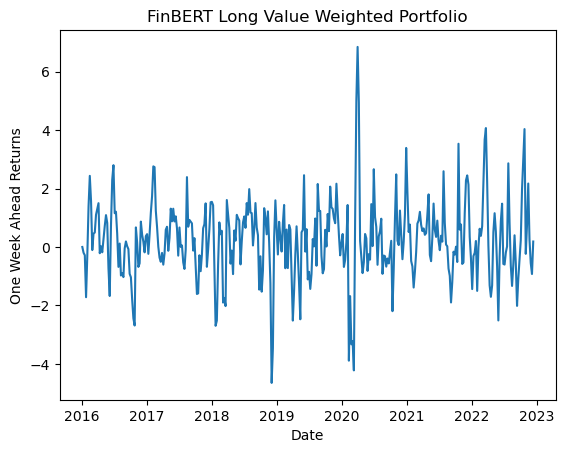

In [46]:
plt.plot(yrs, l_vw, label='FinBERT LVW')
plt.xlabel('Date')  # Replace with your actual x-axis label
plt.ylabel('One Week Ahead Returns')
plt.title('FinBERT Long Value Weighted Portfolio')
# plt.legend()

# Show the plot
plt.show()